In [1]:
import pandas as pd
import numpy as np

In [2]:
def calculate_cm_to_m3(pump):
    """
    Gets the difference of inflow and outflow and see how much cm the pump rises or falls in level
    Then creates a table for each 'normal' water level (meaning with a low zscore) were one can read 
    of as when level goes from {index} cm to {column} cm pump difference in m^3 
    """
    inflow_df = pd.read_csv(f"../processed/pump_in_flow_appr_{pump}.csv")
    # Calculate the difference in pump water volume     
    inflow_df['in_minus_out'] = abs(inflow_df['flow_in'] - inflow_df['hstWaarde'])
    inflow_df['level'] = inflow_df.iloc[:,1].round()
    inflow_df['prev_level'] = inflow_df['level'].shift(1)
    
    # Calculating the 'normal' pump level range     
    min_max_df = inflow_df.copy()
    min_max_df['zscore'] = abs((min_max_df['level'] - min_max_df['level'].mean())/min_max_df['level'].std(ddof=0))
    min_max_df = min_max_df[min_max_df['zscore'] < 1.5]
    max_level = min_max_df['level'].max()
    min_level = min_max_df['level'].min()
    small_df = inflow_df.loc[(inflow_df['level'] < max_level) & (inflow_df['level'] > min_level)]
    
    # And creating a n x m dataframe for the data     
    indexes = np.array(small_df['level'].min() + np.arange(small_df['level'].max() - small_df['level'].min()))
    columns = np.array(small_df['level'].min() + np.arange(small_df['level'].max() - small_df['level'].min()))
    df = pd.DataFrame(0, index=indexes, columns=columns)
    
    # We fill this dataframe with the mean of all corresponding data belonging to every single cell     
    for i in range(len(indexes)):
        index = indexes[i]
        print(index)
        for j in range(len(indexes - i)):
            column = columns[j]
            if (index == column):
                continue
            mean_table = small_df.loc[((small_df['prev_level'] == index) & 
                                      (small_df['level'] == column)) | ((small_df['level'] == index) & 
                                      (small_df['prev_level'] == column)), 'in_minus_out'].dropna().mean()
            df.loc[index, column] = mean_table
    print("Pump done")
    return df

In [ ]:
pumps = ['Engelerschans', 'Maaspoort', 'Rompert', 'Oude Engelenseweg', 'Helftheuvel']
for pump in pumps:
    pump_df = calculate_cm_to_m3(pump)
    pump_df.to_csv(f"../processed/{pump}_cm_m3.csv")

72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.0
186.0
187.0
188.0
189.0
190.0
191.0
192.0
193.0
194.0
195.0
196.0
Pump done
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
1

In [156]:
import pandas as pd
import numpy as np

In [167]:
def to_one_cm_diff_only(df):
    """
    To convert the big dataframe generated above to be only per cm by cycling
    over every cell and dividing it by the amount of cm difference to get a 'mean' over the cm's difference 
    keeping out data when there is more than 30 cm difference
    """
    for index in df.columns:
        index = float(index)
        for column in df.columns:
            column = float(column)
            column_index_diff = abs(column - index);
            if (column == index + 1 or column == index - 1 
                or df.loc[df.index == index, str(column)].iloc[0] == np.nan
                or column_index_diff > 30):
                continue; 
            new_value = df.loc[df.index == index, str(column)].iloc[0] / column_index_diff
            df.loc[df.index == index, str(column)] = new_value
    print("Pump done!")
    return df.mean()

In [169]:
pumps = ['Engelerschans', 'Maaspoort', 'Rompert', 'Oude Engelenseweg', 'Helftheuvel']
for pump in pumps:
    df = pd.read_csv(f"../processed/{pump}_cm_m3.csv", index_col=0)
    pump_df = to_one_cm_diff_only(df)
    pump_df.to_csv(f"../processed/{pump}_1cm_m3.csv")

<ipython-input-167-97404681d988>:11: RuntimeWarning: invalid value encountered in double_scalars
  new_value = df.loc[df.index == index, str(column)].iloc[0] / column_index_diff


Pump done!
Pump done!
Pump done!
Pump done!
Pump done!


In [170]:
df = pd.read_csv("../processed/Engelerschans_1cm_m3.csv")

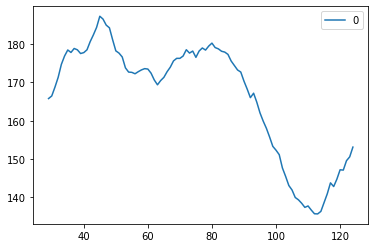

In [182]:
df.rolling(window=30).mean().plot(None, [1])

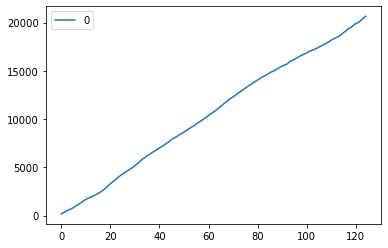

In [185]:
df.cumsum().plot(None, [1])